<a href="https://colab.research.google.com/github/pgpanagiotidis/Hypothesis-testing/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Generic imports we will need
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [9]:
df_performance = pd.read_csv('StudentsPerformance.csv')

In [14]:
print(df_performance.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [11]:
#calculate the frequencies of men and women
counts = df_performance['gender'].value_counts().to_dict()
print(counts)

{'female': 518, 'male': 482}


In [57]:
# Subset data
male = df_performance.query('gender == "male"')['math score']
female = df_performance.query('gender == "female"')['math score']

In [58]:
#some descriptive statistics for the math performance for each group
df_performance.groupby('gender')['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


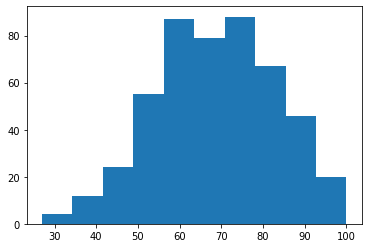

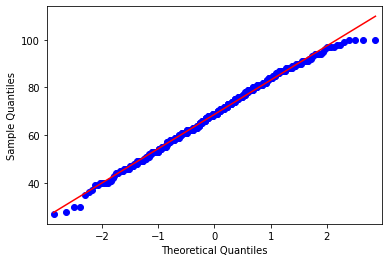

In [59]:
#checking the Normality of Data for male
# histogram plot
pyplot.hist(male)
pyplot.show()
# q-q plot
qqplot(male, line='s')
pyplot.show()

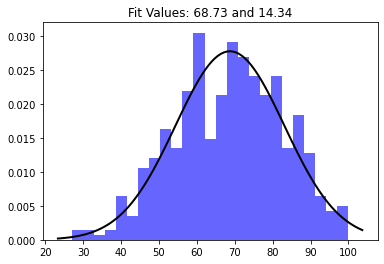

In [60]:
# Fit a normal distribution to the data for male
# mean and standard deviation
mu, std = norm.fit(male) 
  
# Plot the histogram.
plt.hist(male, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

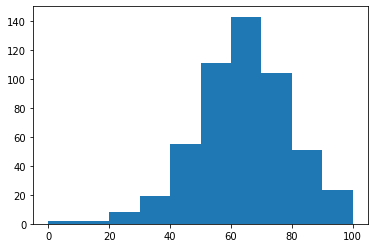

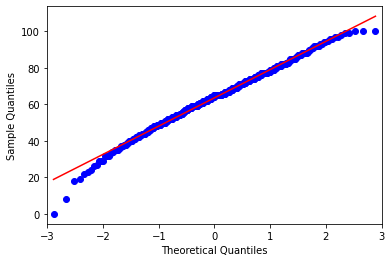

In [61]:
#checking the Normality of Data for female
# histogram plot
pyplot.hist(female)
pyplot.show()
# q-q plot
qqplot(female, line='s')
pyplot.show()

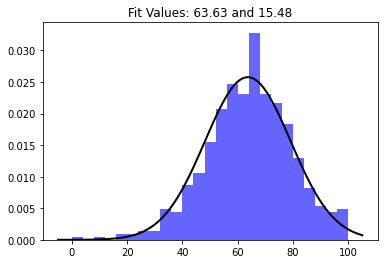

In [62]:
# Fit a normal distribution to the data for female
# mean and standard deviation
mu, std = norm.fit(female) 
  
# Plot the histogram.
plt.hist(female, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

There is no clear evidence for the normality, so we will also use statistical Normality Tests.

In [63]:
#statistical Normality Tests for male
#Shapiro-Wilk Test
stat, p = shapiro(male)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.994, p=0.038
Sample does not look Gaussian (reject H0)


In [64]:
#statistical Normality Tests for male
#Shapiro-Wilk Test
stat, p = shapiro(female)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.991, p=0.004
Sample does not look Gaussian (reject H0)


In [53]:
#continue with non-parametric test as the assumption of normality do not satisfied
# The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test

# Fail to Reject H0: Sample distributions are equal.
# Reject H0: Sample distributions are not equal.
stat, p = mannwhitneyu(male, female)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=79719.500, p=0.000
Different distribution (reject H0)


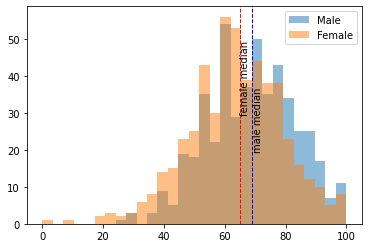

In [81]:
#plot the distribution and the median of each group
bins = np.linspace(0, 100, 30)
pyplot.hist(male, bins, alpha=0.5, label='Male')
pyplot.hist(female, bins, alpha=0.5, label='Female')
plt.axvline(male.median(), color='b', linestyle='dashed', linewidth=1)
plt.text(male.median()+0.15,20,'male median',rotation=90)
plt.axvline(female.median(), color='r', linestyle='dashed', linewidth=1)
plt.text(female.median()+0.15,30,'female median',rotation=90)
pyplot.legend(loc='upper right')
pyplot.show()

As we can identify from the plot above, the males' median seems to be greater than the median of the females regarding the performance in maths.